2)	(10 points) Implement the tutorial found at http://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction

For each line of code, write a short sentence describing the meaning of that code (in your own words). Write a short paragraph describing the overall function of the code. Treat the Support Vector Classifier as a “black box” – don’t worry about how it works (that’s coming later).

# Loading an example dataset

In [3]:
from sklearn import datasets # import dataset
iris = datasets.load_iris()  # load iris dataset and name it as iris
digits = datasets.load_digits()   # load digits
# load the two different datasets of iris and digits datasets. This will be use for our analytics. 

In [4]:
print(digits.data) # print digits to see the array

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [5]:
digits.target # the number corresponding to each digit image from the digit dataset. This wil be used for data arrays. 

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.images[0] # This shows the array of shape n_samples, n_featurees array, and sample is shape of (8,8).

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

# Learning and predicting

In [7]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.) # import support vector classification to prediction estimator which takes as arguments the model's parameters. 

In [9]:
clf.fit(digits.data[:-1], digits.target[:-1]) # clf (classifier) estimator is selected the training set with [:-1] and use all the array which produces a new array contains all but the last item from the digits

SVC(C=100.0, gamma=0.001)

In [10]:
clf.predict(digits.data[-1:]) # predicting to determine the image from the training set

array([8])

# Conventions

In [11]:
import numpy as np
from sklearn import kernel_approximation # load numpy and sklearn for approximation

rng = np.random.RandomState(0) # create randomstate to create random numbers
X = rng.rand(10, 2000) # shape (10,2000) random variables
X = np.array(X, dtype='float32') # change into float 32 from 64
X.dtype

transformer = kernel_approximation.RBFSampler() # reduce the dimensionality
X_new = transformer.fit_transform(X) # transform into data x
X_new.dtype # dtype is float 64 as a default

# X is a float 32 and unchanged by fit_transform. Using this to reduces processing time by leveraging the vector instructions of the CPU. 

dtype('float64')

In [12]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC() # create svc object
clf.fit(iris.data, iris.target)
# Load the iris dataset and sklearn for svm, and classifier of iris data and target. 

list(clf.predict(iris.data[:3]))
# predict the last three into list

clf.fit(iris.data, iris.target_names[iris.target])
# predict svc with the data and target

list(clf.predict(iris.data[:3]))
# predict the three sample from the last with the target labels

['setosa', 'setosa', 'setosa']

# Refitting and updating parameters

In [14]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
X, y = load_iris(return_X_y=True)

clf = SVC()

clf.set_params(kernel='linear').fit(X, y) # apply svc on training dataset with kernel as a linear

clf.predict(X[:5]) # predict the last five sample

clf.set_params(kernel='rbf').fit(X, y) # apply svc with training data as a kernel with value of default

clf.predict(X[:5])

array([0, 0, 0, 0, 0])

# Multiclass vs multilabel fitting

In [16]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2] # initializing the x and y array

classif = OneVsRestClassifier(estimator=SVC(random_state=0)) # applying onevestclassficier using svc
classif.fit(X, y).predict(X) # result of one dimensional with the label

array([0, 0, 1, 1, 2])

In [17]:
y = LabelBinarizer().fit_transform(y) # converting y to 2d label as a binary
classif.fit(X, y).predict(X) # apply multiclass classifier with a two dimensional to the labels provided

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer # import multilabelbinarizer for multiple labels of the data
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]] # initalize the y
y = MultiLabelBinarizer().fit_transform(y) # transform into multicalss classfier

Implement the tutorial here: http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#example-classification-plot-digits-classification-py
 
For each line of code, write a short sentence describing the meaning of that code (in your own words). Write a short paragraph describing the overall function of the code. As above, treat the Support Vector Classifier as a “black box” – don’t worry about how it works (that’s coming later).

In [19]:
import matplotlib.pyplot as plt # using matplotlib for plotting

# Import datasets, classifiers, performance metrics, and the package to split the train and test data
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Digits dataset

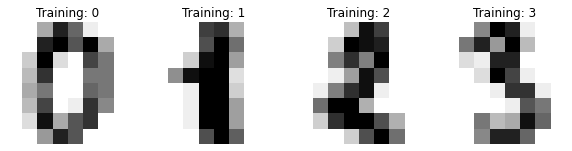

In [20]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3)) # visualization of the digit image
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest") # show the image
    ax.set_title("Training: %i" % label) # title of the image output

# Classification

In [22]:
# number of samples to convert into 1d shape
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets with the test sizze 0.5
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# apply classifier on the train dataset
clf.fit(X_train, y_train)

# Predict the value with test dataset
predicted = clf.predict(X_test)

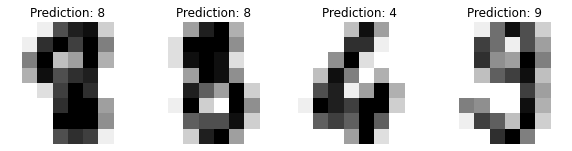

In [23]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3)) # visualization of the four digits iamge of the test data
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8) # set the x and y axis for the image output
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest") # show the image
    ax.set_title(f"Prediction: {prediction}")

In [24]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
) # print the classification for the classifier result with the precision, recall, f1score, and support

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


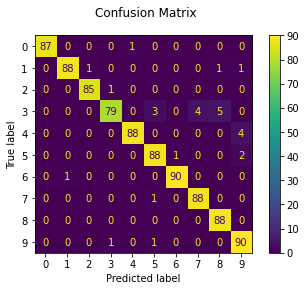

In [25]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted) # create the confusion matrix display with the real value and predicted value
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}") # print the matrix

plt.show()

In [26]:
y_true = []
y_pred = []
cm = disp.confusion_matrix # lists of true and predicted, and make a matrix of these

# Making function to each cell in the matrix with adding the true and predict lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


